In [1]:
import re
import nltk
import gensim
import string

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
sns.set_context('talk')

In [3]:
def remove_punctuation(text):
    return re.sub('[^a-zA-Z]', ' ', str(text))

def lower_case(text):
    return text.lower()    

def remove_tags(text):    
    return re.sub("&lt;/?.*?&gt;"," &lt;&gt; ", text)

def remove_special_chars_and_digits(text):
    return re.sub("(\\d|\\W)+"," ", text)

def remove_stop_words(tokenized_text):
    return [w for w in tokenized_text if not w in set(stopwords.words('english'))]

def normalize_text(text: str) -> str:
    text = remove_punctuation(text)
    text = lower_case(text)
    text = remove_tags(text)
    text = remove_special_chars_and_digits(text)
    
    return text

In [4]:
class_corpus = pd.read_csv('ClassCorpus_V2.csv')

In [5]:
class_corpus_copy = class_corpus.copy()

In [6]:
class_corpus_copy['normalized_review_text'] = class_corpus_copy['MovieReview'].apply(normalize_text)

vectorizer_tfidf = TfidfVectorizer(stop_words=set(stopwords.words('english')))
tfidf_corpus = vectorizer_tfidf.fit_transform(class_corpus_copy['normalized_review_text'])

In [7]:
NUM_TOPICS = 10

In [8]:
model_lda = LatentDirichletAllocation(n_components=NUM_TOPICS,
                                      random_state=20130810)

In [9]:
model_lda.fit(tfidf_corpus)

LatentDirichletAllocation(random_state=20130810)

Plotting function to visualize top words that define each topic ([Source](https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py))

In [10]:
def plot_top_words(model, feature_names, n_top_words, title):

    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

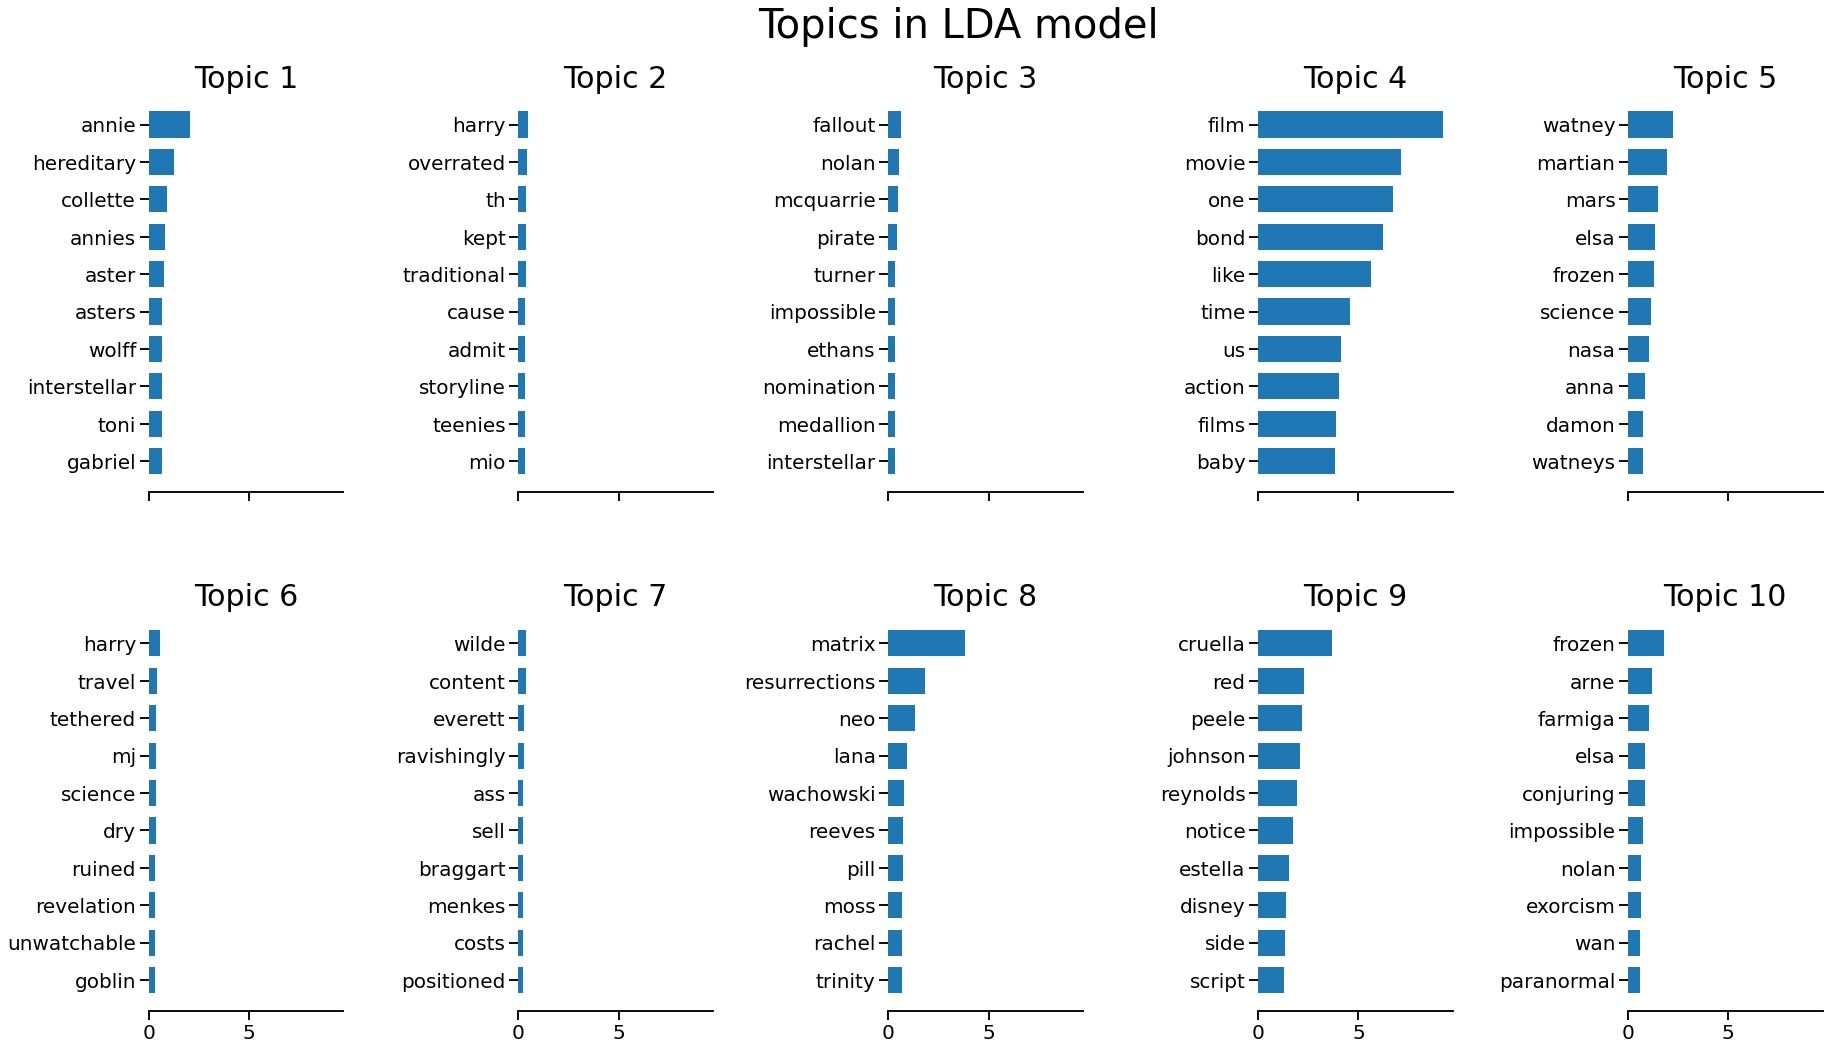

In [11]:
plot_top_words(model=model_lda,
               feature_names=vectorizer_tfidf.get_feature_names_out(),
               n_top_words=10,
               title='Topics in LDA model')